# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Ratih Anggraeni
- **Email:** m182b4kx3698@bangkit.academy
- **ID Dicoding:** ratihanggraeni

## Menentukan Pertanyaan Bisnis

- Di musim apa rata-rata penyewaan sepeda harian tertinggi, dan di musim apa rata-rata penyewaan sepeda harian terendah?
- Pada jam berapa jumlah penyewaan sepeda tertinggi terjadi, dan di jam berapa jumlah penyewaan sepeda paling rendah dalam satu hari?

## Import Semua Packages/Library yang Digunakan

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

### Hour

In [38]:
#Load file hour.csv
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Day

In [39]:
#Load file day.csv
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- File hour.csv Data ini mencatat jumlah penyewaan sepeda per jam, termasuk informasi seperti tanggal, musim, hari, kondisi cuaca, suhu, kelembaban, kecepatan angin, serta jumlah pengguna terdaftar dan tidak terdaftar.
- File day.csv Data ini mencatat jumlah penyewaan sepeda per hari, dengan informasi serupa seperti pada hour.csv namun lebih umum. Dengan data harian ini, saya dapat melihat tren penggunaan sepeda dalam jangka waktu lebih panjang, termasuk pengaruh musim, hari libur, dan perbedaan antara hari kerja dan akhir pekan terhadap jumlah penyewaan.

### Assessing Data

### Hour

In [40]:
# memeriksa tipe data data dari tiap kolom
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [41]:
# Periksa apakah ada duplikasi data
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [42]:
# Periksa apakah ada missing value
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [43]:
# Menampilkan ringkasan parameter statistik
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Day

In [44]:
# memeriksa tipe data data dari tiap kolom
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [45]:
# Periksa apakah ada duplikasi data
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [46]:
# Periksa apakah ada missing value
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [47]:
# Menampilkan ringkasan parameter statistik
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**

Kualitas data sudah baik tanpa anomali, missing value, duplikat, atau nilai tidak akurat, namun beberapa perbaikan tetap diperlukan. Kolom instant di day_df akan dihapus karena tidak relevan, sementara workingday juga akan dihapus karena sudah diwakili oleh weekday. Kolom season, mnth, holiday, weekday, dan weathersit akan diubah dari tipe int menjadi category karena seharusnya bersifat kategorikal. dteday akan diubah dari object menjadi datetime untuk memudahkan analisis. Nama kolom akan disederhanakan agar lebih mudah dibaca, dan kolom category_days akan ditambahkan untuk menunjukkan apakah hari tersebut adalah weekend atau weekday.

### Cleaning Data

#### Dropping

In [48]:
# Hapus kolom instant dan workingday pada hour.
hour_df.drop(["workingday"], axis = 1, inplace= True)

# Hapus kolom instant dan workingday pada day.
day_df.drop(["workingday"], axis = 1, inplace= True)
day_df.drop(["instant"], axis = 1, inplace= True)

#### Konversi Tipe Data

In [49]:
# Ubah tipe data numerik ke categori
columns = ["season", "mnth", "holiday", "weekday", "weathersit"]
 
for column in columns:
    day_df[column] =  day_df[column].astype("category")
    
    hour_df[column] =  hour_df[column].astype("category")


In [50]:
# ubah tipe data object ke datetime
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

#### Rename

In [51]:
# ubah nama kolom di day_df
day_df.rename(columns={
    "yr": "year",
    "mnth": "month",
    "weekday": "one_of_week",
    "weathersit": "weather_situation",
    "windspeed": "wind_speed",
    "cnt": "count",
    "hum": "humidity"
}, inplace=True)

In [52]:
#  ubah nama kolom di hour_df
hour_df.rename(columns={
    "yr": "year",
    "hr": "hours",
    "mnth": "month",
    "weekday": "one_of_week",
    "weathersit": "weather_situation",
    "windspeed": "wind_speed",
    "cnt": "count",
    "hum": "humidity"
}, inplace=True)

In [53]:
# Fungsi untuk mengganti nilai dalam kolom DataFrame
def replace_values(df, column, replacements):
    """Mengganti nilai dalam kolom DataFrame."""
    df[column] = df[column].replace(replacements)

# Konversi season
season_mapping = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
replace_values(day_df, 'season', season_mapping)
replace_values(hour_df, 'season', season_mapping)

# Konversi month
month_mapping = {
    1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May",
    6: "Jun", 7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct",
    11: "Nov", 12: "Dec"
}
replace_values(day_df, 'month', month_mapping)
replace_values(hour_df, 'month', month_mapping)

# Konversi weather_situation
weather_mapping = {1: "Clear", 2: "Misty", 3: "Light_RainSnow", 4: "Heavy_RainSnow"}
replace_values(day_df, 'weather_situation', weather_mapping)
replace_values(hour_df, 'weather_situation', weather_mapping)

# Konversi one_of_week
week_mapping = {
    0: "Sunday", 1: "Monday", 2: "Tuesday", 
    3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"
}
replace_values(day_df, 'one_of_week', week_mapping)
replace_values(hour_df, 'one_of_week', week_mapping)

# Konversi year
year_mapping = {0: "2011", 1: "2012"}
replace_values(day_df, 'year', year_mapping)
replace_values(hour_df, 'year', year_mapping)

# Menghitung Humidity
day_df['humidity'] = day_df['humidity'] * 100
hour_df['humidity'] = hour_df['humidity'] * 100

C:\Users\user\AppData\Local\Temp\ipykernel_15280\816707543.py:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df[column] = df[column].replace(replacements)
C:\Users\user\AppData\Local\Temp\ipykernel_15280\816707543.py:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df[column] = df[column].replace(replacements)
C:\Users\user\AppData\Local\Temp\ipykernel_15280\816707543.py:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categorie

#### Membuat kolom baru bernama category_days

In [54]:
# Membuat kolom baru bernama category_days
def get_category_days(day):
    return "weekend" if day in ["Saturday", "Sunday"] else "weekdays"

# Gunakan fungsi untuk membuat kolom category_days
hour_df["category_days"] = hour_df["one_of_week"].apply(get_category_days)
day_df["category_days"] = day_df["one_of_week"].apply(get_category_days)

In [55]:
def classify_humidity(humidity):
    if humidity < 45:
        return "Terlalu kering"
    elif 45 <= humidity < 65:
        return "Ideal"
    return "Terlalu lembab"

# Terapkan fungsi untuk membuat kolom humidity_category
hour_df["humidity_category"] = hour_df["humidity"].apply(classify_humidity)
day_df["humidity_category"] = day_df["humidity"].apply(classify_humidity)

**Insight:**

Perbaikan telah selesai dilakukan, dengan kolom **instant** dan **workingday** dihapus. Kolom **season**, **mnth**, **holiday**, **weekday**, dan **weathersit** telah diubah dari tipe int menjadi kategori. Selain itu, kolom **dteday** diubah dari object menjadi datetime, dan kolom baru bernama **category_days** akan ditambahkan untuk mengklasifikasikan hari sebagai weekday atau weekend.

## Exploratory Data Analysis (EDA)

### Hour

In [56]:
# melihat rangkuman parameter statistik dari data hour_df 
hour_df.describe(include="all")

,instant,dteday,season,year,month,hours,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count,category_days,humidity_category
count,17379.0000,17379,17379,17379,17379,17379.000000,17379.0,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379
unique,NaN,NaN,4,2,12,NaN,2.0,7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,NaN,Fall,2012,May,NaN,0.0,Saturday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,Terlalu lembab
freq,NaN,NaN,4496,8734,1488,NaN,16879.0,2512,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12365,8356
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,0.496987,0.475775,62.722884,0.190098,35.676218,153.786869,189.463088,NaN,NaN
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,0.340000,0.333300,48.000000,0.104500,4.000000,34.000000,40.000000,NaN,NaN
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,0.500000,0.484800,63.000000,0.194000,17.000000,115.000000,142.000000,NaN,NaN
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,0.660000,0.621200,78.000000,0.253700,48.000000,220.000000,281.000000,NaN,NaN
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,1.000000,1.000000,100.000000,0.850700,367.000000,886.000000,977.000000,NaN,NaN


In [57]:
# Agregasi sewa berdasarkan jam
hourly_counts = hour_df.groupby(by="hours").agg({"count": "sum"})

# Mengubah format angka dengan titik sebagai pemisah ribuan
hourly_counts['count'] = hourly_counts['count'].apply(lambda x: f"{int(x):,}".replace(",", "."))

# Menampilkan hasil
print(hourly_counts)


         count
hours         
0       39.130
1       24.164
2       16.352
3        8.174
4        4.428
5       14.261
6       55.132
7      154.171
8      261.001
9      159.438
10     126.257
11     151.320
12     184.414
13     184.919
14     175.652
15     183.149
16     227.748
17     336.860
18     309.772
19     226.789
20     164.550
21     125.445
22      95.612
23      63.941


### Day

In [58]:
# melihat rangkuman parameter statistik dari data day_df 
day_df.describe(include="all")

,dteday,season,year,month,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count,category_days,humidity_category
count,731,731,731,731,731.0,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731,731
unique,NaN,4,2,12,2.0,7,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,Fall,2012,Jan,0.0,Sunday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,Ideal
freq,NaN,188,366,62,710.0,105,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521,334
mean,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,62.789406,0.190486,848.176471,3656.172367,4504.348837,NaN,NaN
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN,NaN
25%,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,52.000000,0.134950,315.500000,2497.000000,3152.000000,NaN,NaN
50%,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,62.666700,0.180975,713.000000,3662.000000,4548.000000,NaN,NaN
75%,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,73.020850,0.233214,1096.000000,4776.500000,5956.000000,NaN,NaN
max,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,97.250000,0.507463,3410.000000,6946.000000,8714.000000,NaN,NaN


In [59]:
# Melihat jumlah penyewaan tiap musim
top_seasons = (
    day_df.groupby(by="season", observed=True)["count"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
    .head(10)
)

# Mengubah format angka dengan titik sebagai pemisah ribuan
top_seasons['count'] = top_seasons['count'].apply(lambda x: f"{int(x):,}".replace(",", "."))

# Menampilkan hasil
print(top_seasons)


   season      count
0    Fall  1.061.129
1  Summer    918.589
2  Winter    841.613
3  Spring    471.348


**Insight:**

Hasil eksplorasi data menunjukkan terdapat 17.379 pelanggan dengan rata-rata penyewaan sepeda terjadi pada pukul 11.54, dan standar deviasi sebesar 6.91. Penyewaan terbanyak terjadi pada pukul 17.00, sementara pukul 04.00 mencatat penyewaan paling sedikit. Selain itu, musim fall dan summer merupakan dua musim dengan jumlah penyewaan tertinggi.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

- Pada jam berapa jumlah penyewaan sepeda tertinggi terjadi, dan di jam berapa jumlah penyewaan sepeda paling rendah dalam satu hari?

C:\Users\user\AppData\Local\Temp\ipykernel_15280\2929171930.py:20: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(


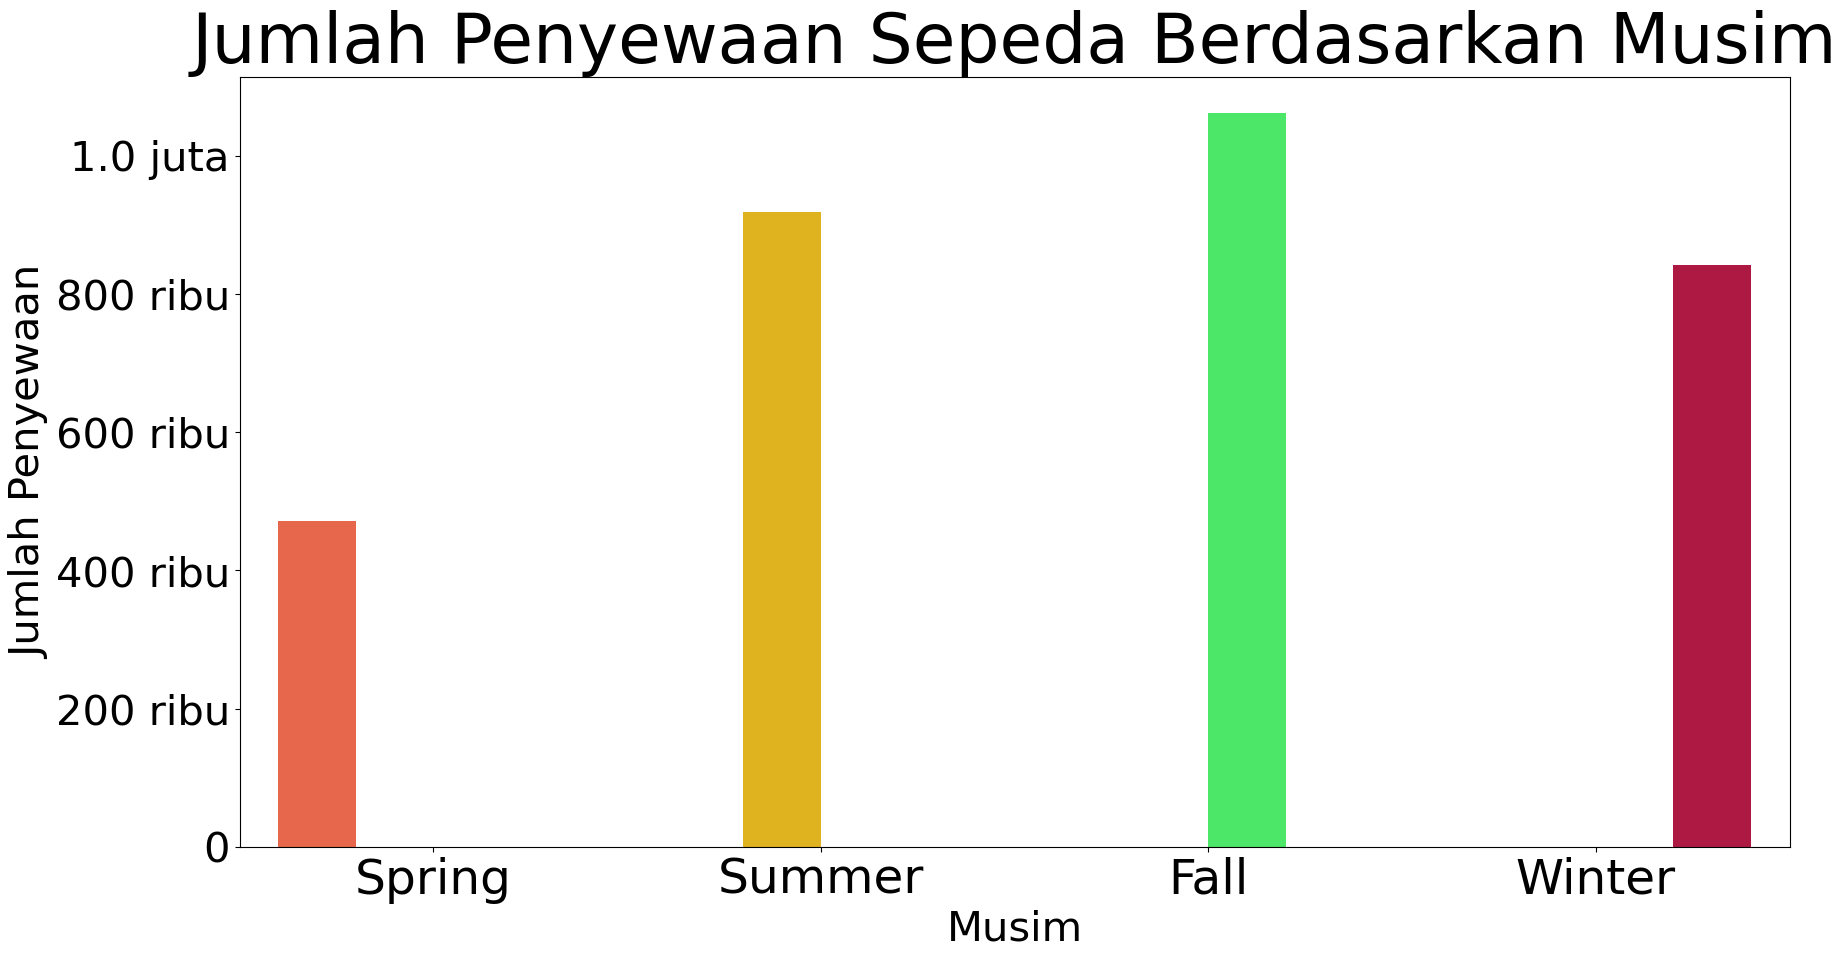

In [60]:
from matplotlib.ticker import FuncFormatter

# Misalkan day_df adalah DataFrame yang sudah ada
# Mengatur warna yang berbeda
colors = ["#FF5733", "#FFC300", "#33FF57", "#C70039", "#900C3F"]  # Warna yang bervariasi

# Membuat subplot dengan ukuran (20, 10)
fig, ax = plt.subplots(figsize=(20, 10))

# Menghitung jumlah penyewaan per musim
top_seasons = (
    day_df.groupby(by="season", observed=True)["count"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
    .head(10)
)

# Buat barplot untuk y="count" dan x="season"
sns.barplot(
    x="season",
    y="count",
    data=top_seasons,  # Menggunakan data yang sudah diolah
    ax=ax,
    palette=colors,
    hue="season",  # Menetapkan hue ke "season" untuk menghindari peringatan
    dodge=True,   # Memisahkan bar berdasarkan musim
    legend=False   # Menghilangkan legend
)

# Mengatur format sumbu y untuk menampilkan angka dalam ribu dan juta
def format_func(value, tick_number):
    if value >= 1_000_000:
        return f'{value / 1_000_000:.1f} juta'
    elif value >= 1_000:
        return f'{value / 1_000:.0f} ribu'
    else:
        return int(value)

ax.yaxis.set_major_formatter(FuncFormatter(format_func))

# Mengatur judul, label y dan x, serta tick params untuk subplot tersebut
ax.set_title("Jumlah Penyewaan Sepeda Berdasarkan Musim", loc="center", fontsize=50)
ax.set_ylabel("Jumlah Penyewaan", fontsize=30)
ax.set_xlabel("Musim", fontsize=30)
ax.tick_params(axis='x', labelsize=35)
ax.tick_params(axis='y', labelsize=30)

# Menampilkan plot
plt.show()


### Pertanyaan 2:

- Pada jam berapa jumlah penyewaan sepeda tertinggi terjadi, dan di jam berapa jumlah penyewaan sepeda paling rendah dalam satu hari?

In [61]:
# Grouping berdasarkan jam dan menghitung jumlah penyewaan
sum_order_items_df = hour_df.groupby("hours")["count"].sum().sort_values(ascending=False).reset_index()

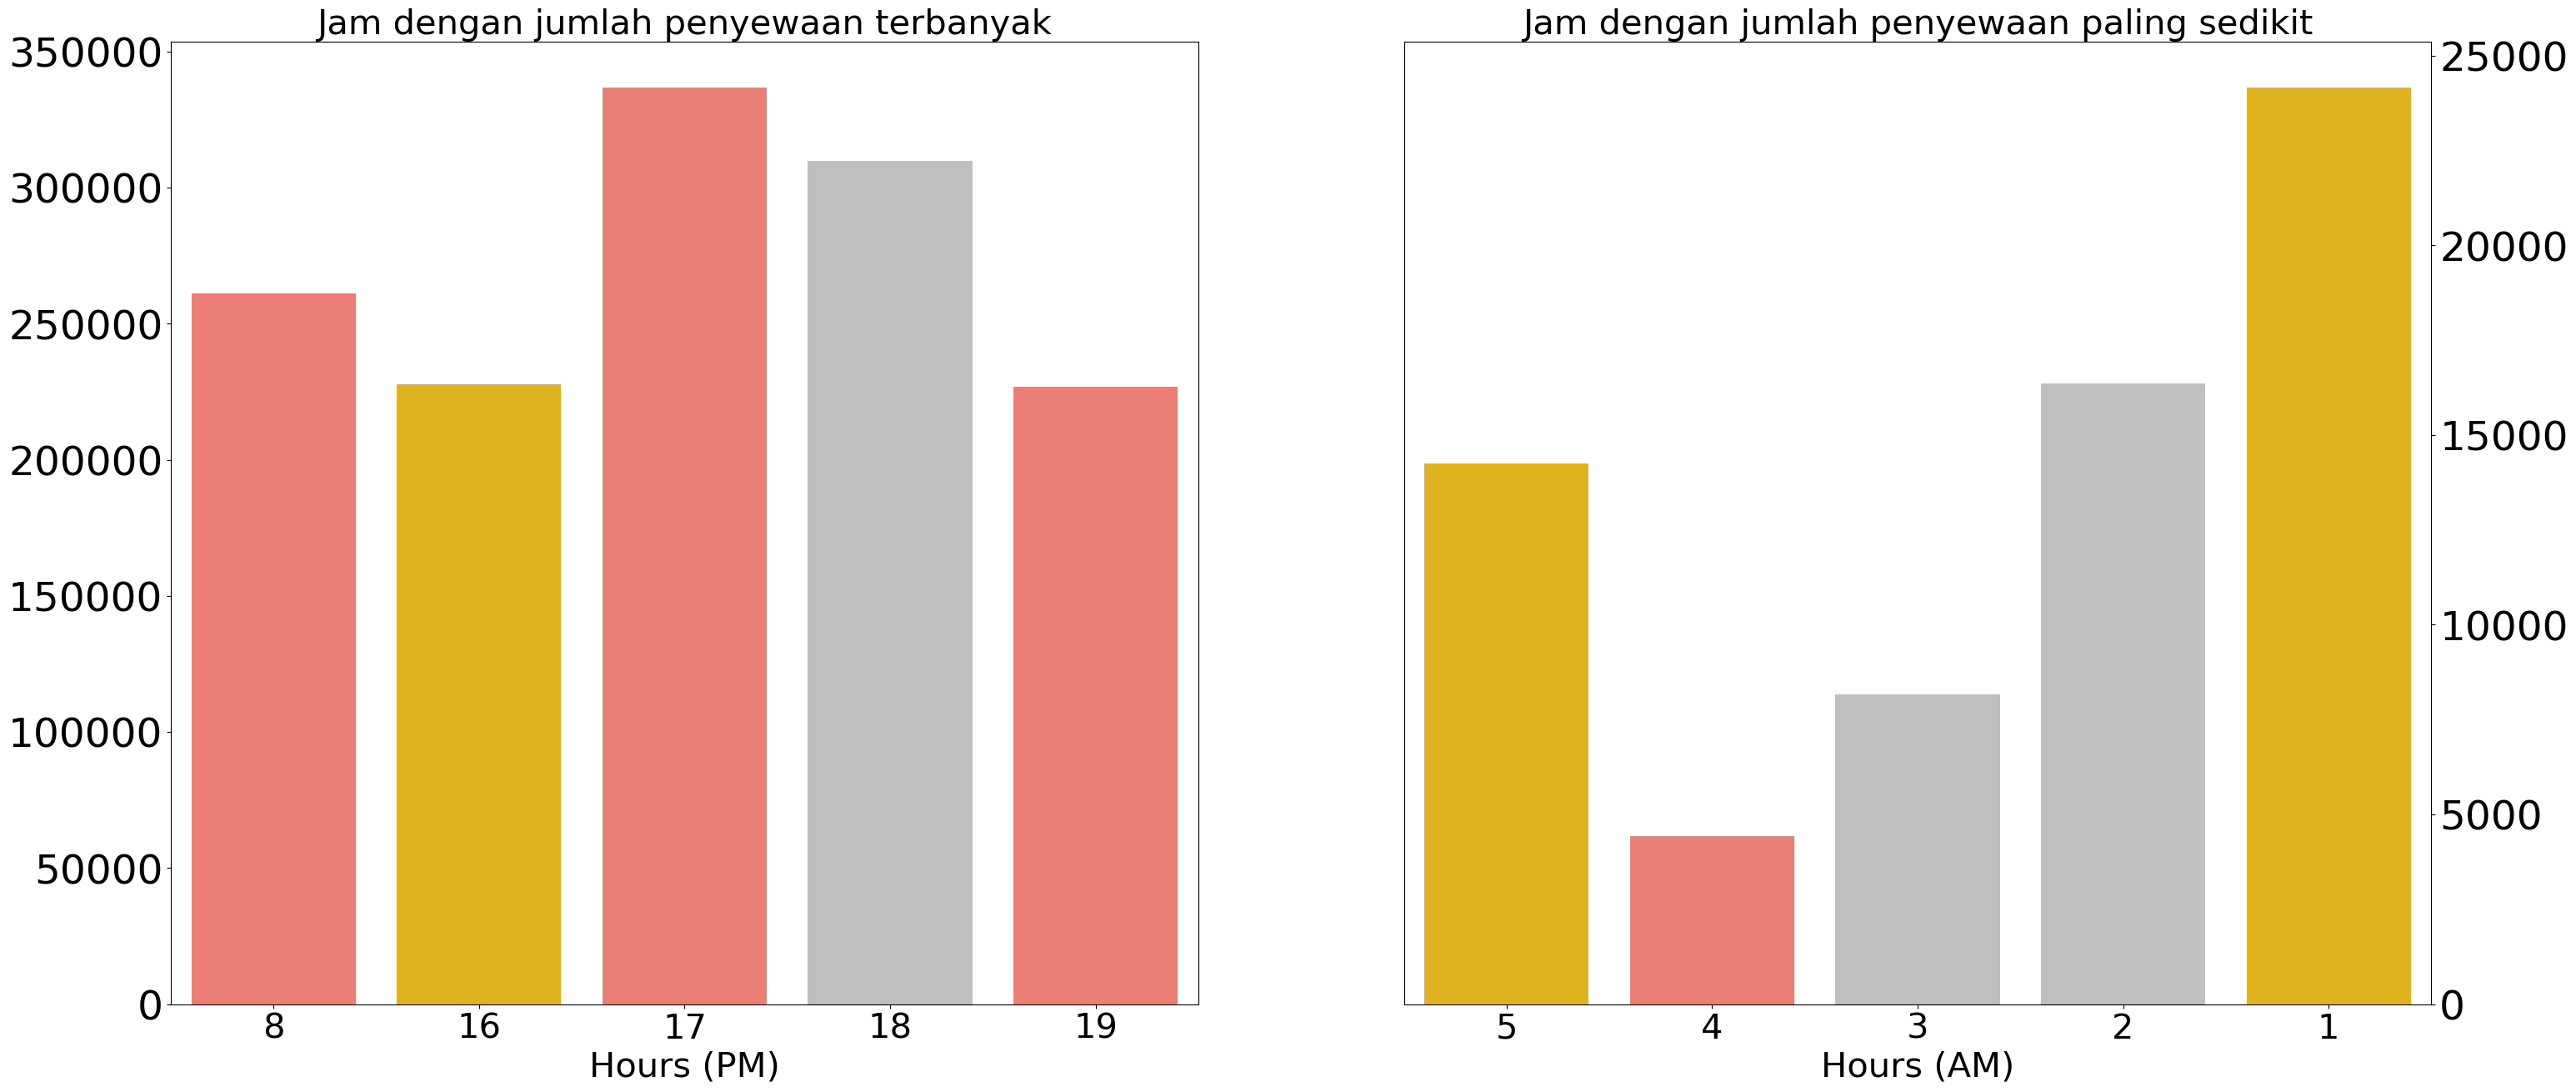

In [62]:
# Membuat bar chart untuk melihat perbedaan penyewaan sepeda berdasarkan jam
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(35, 15))

# Membuat barplot untuk penyewa sepeda terbanyak 
sns.barplot(x="hours", y="count", data=sum_order_items_df.head(5), 
            hue="hours", palette=["#FF6F61", "#FFC300", "#FF6F61", "#BFBFBF", "#FF6F61"], 
            ax=ax[0], legend=False)

# Mengatur label dan judul untuk subplot pertama
ax[0].set_ylabel(None)
ax[0].set_xlabel("Hours (PM)", fontsize=30)
ax[0].set_title("Jam dengan jumlah penyewaan terbanyak", loc="center", fontsize=30)
ax[0].tick_params(axis='y', labelsize=35)
ax[0].tick_params(axis='x', labelsize=30)

# Membuat barplot untuk penyewa sepeda terdikit 
sns.barplot(x="hours", y="count", data=sum_order_items_df.sort_values(by="count", ascending=True).head(5), 
            hue="hours", palette=["#FFC300", "#BFBFBF", "#BFBFBF", "#FF6F61", "#FFC300"], 
            ax=ax[1], legend=False)

# Mengatur label dan judul untuk subplot kedua
ax[1].set_ylabel(None)
ax[1].set_xlabel("Hours (AM)", fontsize=30)
ax[1].set_title("Jam dengan jumlah penyewaan paling sedikit", loc="center", fontsize=30)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].tick_params(axis='y', labelsize=35)
ax[1].tick_params(axis='x', labelsize=30)

# Menampilkan plot
plt.show()

**Insight:**

- Pertanyaan 1 Grafik di atas menunjukkan fluktuasi yang signifikan dalam jumlah penyewaan sepeda sepanjang tahun, dengan musim gugur (Fall) menjadi periode dengan permintaan tertinggi.
- Pertanyaan 2 Dapat disimpulkan bahwa waktu memiliki pengaruh yang sangat signifikan terhadap jumlah penyewaan sepeda. Sore hari (sekitar pukul 16:00 - 19:00) merupakan waktu puncak penyewaan sepeda, sedangkan dini hari merupakan waktu dengan jumlah penyewaan paling sedikit.

## Analisis Lanjutan (Opsional)

### 1. Analisis Clustering

#### Total Pengguna Berdasarkan weather_situation

In [63]:
# Menghitung jumlah nilai unik untuk setiap kolom berdasarkan situasi cuaca
weather_counts = hour_df.groupby(by="weather_situation", observed=True).nunique()

# Mengurutkan hasil berdasarkan jumlah unik dan menampilkannya
sorted_weather_counts = weather_counts.sort_values(by='count', ascending=False)

# Menampilkan hasil
print(sorted_weather_counts)

                   instant  dteday  season  year  month  hours  holiday  \
weather_situation                                                         
Clear                11413     700       4     2     12     24        2   
Misty                 4544     567       4     2     12     24        2   
Light_RainSnow        1419     300       4     2     12     24        2   
Heavy_RainSnow           3       3       1     2      1      3        1   

                   one_of_week  temp  atemp  humidity  wind_speed  casual  \
weather_situation                                                           
Clear                        7    50     65        84          28     315   
Misty                        7    47     59        78          25     219   
Light_RainSnow               7    40     49        57          25     121   
Heavy_RainSnow               3     3      3         2           3       2   

                   registered  count  category_days  humidity_category  
weather_situa

**Insight:**

- Cuaca Cerah (Clear) dan Berkabut (Misty) adalah kondisi cuaca yang paling disukai oleh penyewa sepeda. Jumlah penyewaan sepeda paling banyak terjadi saat cuaca cerah (848 kali) dan berkabut (649 kali). Ini menunjukkan bahwa sebagian besar orang lebih memilih untuk bersepeda ketika cuaca cerah atau berkabut.
- Cuaca hujan, baik ringan maupun lebat, sangat mengurangi minat orang untuk menyewa sepeda. Jumlah penyewaan sepeda saat cuaca hujan ringan (368 kali) jauh lebih sedikit dibandingkan saat cuaca cerah atau berkabut. Bahkan, saat cuaca hujan lebat, jumlah penyewaan sepeda sangat sedikit (hanya 3 kali). Ini menunjukkan bahwa hujan, terutama hujan lebat, merupakan penghalang utama bagi orang untuk melakukan aktivitas bersepeda.

#### Total Pengguna Berdasarkan Humidity

In [64]:
hour_df.groupby(by="humidity_category").agg({"count": ["count"]})

,count
,count
humidity_category,
Ideal,5505
Terlalu kering,3518
Terlalu lembab,8356


**Insight:**

Kelembapan yang lebih tinggi membuat orang untuk menyewa sepeda lebih banyak.

### 2. RFM Analysis

In [65]:
current_date = max(hour_df['dteday'])
rfm_df = hour_df.groupby('registered').agg({
    'dteday': lambda x: (current_date - x.max()).days,  # Recency
    'instant': 'count',  # Frequency
    'count': 'sum'  # Monetary
}).reset_index()

# Rename nama
rfm_df.columns = ['registered', 'Recency', 'Frequency', 'Monetary']

print(rfm_df.head())

   registered  Recency  Frequency  Monetary
0           0       38         24        35
1           1        0        201       294
2           2        1        245       648
3           3        0        294      1154
4           4        3        307      1602


**Insight:**

Analisis RFM (Recency, Frequency, Monetary) menunjukkan bahwa pengguna sepeda yang sering menyewa (Frequency tinggi) dan total penyewaannya banyak (Monetary tinggi) cenderung merupakan pengguna yang lebih aktif. Sebaliknya, pengguna yang sudah lama tidak menyewa (Recency tinggi) mungkin perlu diberikan perhatian khusus, seperti program loyalitas atau penawaran menarik, untuk mendorong mereka kembali menggunakan layanan penyewaan sepeda.

## Conclusion

Dapat disimpulkan bahwa permintaan penyewaan sepeda dipengaruhi oleh berbagai faktor, termasuk musim, waktu, kondisi cuaca, dan kelembapan. Musim gugur menunjukkan permintaan tertinggi, sementara waktu sore menjadi puncak penyewaan. Cuaca cerah dan berkabut adalah kondisi yang paling diminati, sedangkan hujan, terutama hujan lebat, secara signifikan mengurangi minat penyewa. Selain itu, kelembapan yang lebih tinggi mendorong pengguna untuk menyewa lebih banyak. Melalui analisis RFM, teridentifikasi bahwa pengguna dengan frekuensi dan total penyewaan yang tinggi adalah yang paling aktif, sedangkan pengguna yang jarang menyewa perlu diberikan perhatian lebih untuk meningkatkan keterlibatan mereka, misalnya melalui program loyalitas atau penawaran menarik.